# Coding Etiquette & Excel Reporting

## Part 1 continued...

#### 6. Import libraries and dataset
#### 7. Create an appropriate visualization to show the distribution of profiles.
#### 8. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#### 9.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
#### 10.Produce suitable charts to illustrate your results and export them in your project folder.
#### 11. Tidy up your script, export your final data set, and save your notebook.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataset

df_master = pd.read_pickle(r'C:\Users\Owner\Desktop\Data Analyst\01-31-2022 Instacart Basket Analysis\02 Data\Prepared Data\df_final.pkl')

In [3]:
df_master.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,days_since_prior_order,df_ords_first_order,product_id,add_to_cart_order,product_name,...,dependants,marital_status,income,region,exclusion_flag,age_group,income_group,parental_status,day_of_week,part_of_day
0,2539329,1,1,2,8,NaN,True,196,1,Soda,...,3,married,40423,South,high activity customer,31-40,20000 - 50000,Parent,Monday,Morning
1,2398795,1,2,3,7,15.0,False,196,1,Soda,...,3,married,40423,South,high activity customer,31-40,20000 - 50000,Parent,Tuesday,Morning
2,473747,1,3,3,12,21.0,False,196,1,Soda,...,3,married,40423,South,high activity customer,31-40,20000 - 50000,Parent,Tuesday,Morning
3,2254736,1,4,4,7,29.0,False,196,1,Soda,...,3,married,40423,South,high activity customer,31-40,20000 - 50000,Parent,Wednesday,Morning
4,431534,1,5,4,15,28.0,False,196,1,Soda,...,3,married,40423,South,high activity customer,31-40,20000 - 50000,Parent,Wednesday,Afternoon


## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [10]:
# Aggregate age and prices

agg_age_price = df_master.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [11]:
agg_age_price.to_clipboard()

In [4]:
# Aggregate age and order number

agg_age_order_number = df_master.groupby('age').agg({'order_number' : ['min', 'mean', 'max']})

In [6]:
agg_age_order_number.describe()

order_number                 
               min       mean   max
count         64.0  64.000000  64.0
mean           1.0  17.137405  99.0
std            0.0   0.419595   0.0
min            1.0  16.252157  99.0
25%            1.0  16.897902  99.0
50%            1.0  17.095798  99.0
75%            1.0  17.385666  99.0
max            1.0  18.121511  99.0

In [13]:
agg_age_order_number.to_clipboard()

In [7]:
# Aggregate income group and prices

agg_income_price = df_master.groupby('income_group').agg({'prices' : ['min', 'mean', 'max']})

In [15]:
agg_income_price.to_clipboard()

In [10]:
# Aggregate income range and order number

agg_income_order = df_master.groupby('income_group').agg({'order_number' : ['min', 'mean', 'max']})

In [17]:
agg_income_order.to_clipboard()

In [12]:
# Aggregate marital status and prices

agg_marital_status_price = df_master.groupby('marital_status').agg({'prices' : ['min', 'mean', 'max']})

In [19]:
agg_marital_status_price.to_clipboard()

In [20]:
# Aggregate marital status + order number

agg_marital_status_order = df_master.groupby('marital_status').agg({'order_number' : ['min', 'mean', 'max']})

In [21]:
agg_marital_status_order.to_clipboard()

In [22]:
# Aggregating dependants and prices

agg_dependants_price = df_master.groupby('dependants').agg({'prices' : ['min', 'mean', 'max']})

In [23]:
agg_dependants_price.to_clipboard()

In [24]:
# Aggregate dependants and order number

agg_dependants_order = df_master.groupby('dependants').agg({'order_number' : ['min', 'mean', 'max']})

In [25]:
agg_dependants_order.to_clipboard()

In [26]:
# Aggregate parental status and prices

agg_parental_price = df_master.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

In [27]:
agg_parental_price.to_clipboard()

In [28]:
# Aggregate parental status and order number

agg_parental_order= df_master.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

In [29]:
agg_parental_order.to_clipboard()

### For further analysis, I will need infomation on department name.
### I tried to merge the dataset but experienced memory error, hence I will create a column to assign department names to the department_id

In [30]:
# Create column 'department_name

df_master.loc[df_master['department_id'] == 1, 'department_name'] = 'frozen'
df_master.loc[df_master['department_id'] == 2, 'department_name'] = 'other'
df_master.loc[df_master['department_id'] == 3, 'department_name'] = 'bakery'
df_master.loc[df_master['department_id'] == 4, 'department_name'] = 'produce'
df_master.loc[df_master['department_id'] == 5, 'department_name'] = 'alcohol'
df_master.loc[df_master['department_id'] == 6, 'department_name'] = 'international'
df_master.loc[df_master['department_id'] == 7, 'department_name'] = 'beverages'
df_master.loc[df_master['department_id'] == 8, 'department_name'] = 'pets'
df_master.loc[df_master['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_master.loc[df_master['department_id'] == 10, 'department_name'] = 'bulk'
df_master.loc[df_master['department_id'] == 11, 'department_name'] = 'personal care'
df_master.loc[df_master['department_id'] == 12, 'department_name'] = 'meat seafood'
df_master.loc[df_master['department_id'] == 13, 'department_name'] = 'pantry'
df_master.loc[df_master['department_id'] == 14, 'department_name'] = 'breakfast'
df_master.loc[df_master['department_id'] == 15, 'department_name'] = 'canned goods'
df_master.loc[df_master['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_master.loc[df_master['department_id'] == 17, 'department_name'] = 'households'
df_master.loc[df_master['department_id'] == 18, 'department_name'] = 'babies'
df_master.loc[df_master['department_id'] == 19, 'department_name'] = 'snacks'
df_master.loc[df_master['department_id'] == 20, 'department_name'] = 'deli'
df_master.loc[df_master['department_id'] == 21, 'department_name'] = 'missing'

In [31]:
# Print frequency

df_master['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

## The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

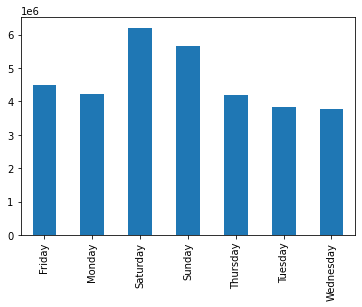

In [32]:
# Busiest day of the week

busiest_days_bar = df_master['day_of_week'].value_counts().sort_index().plot.bar()

### Saturday is the busiest day of the week, followed by Sunday

In [33]:
path = r'C:\Users\Owner\Desktop\Data Analyst\01-31-2022 Instacart Basket Analysis'

In [34]:
# Export visualization

busiest_days_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_days_bar.png'))

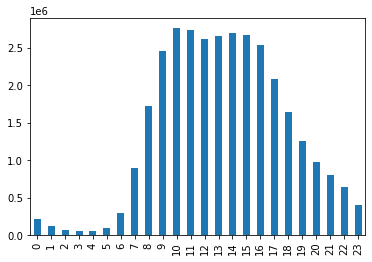

In [35]:
# Busiest hour of the day

busiest_hour_bar = df_master['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [36]:
# Export visualization

busiest_hour_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_hour_bar.png'))

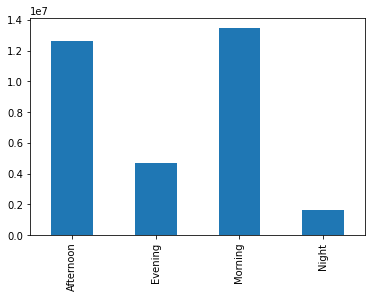

In [37]:
# Busiest part of day

busiest_part_of_day_bar = df_master['part_of_day'].value_counts().sort_index().plot.bar()

In [38]:
# Export visualization

busiest_part_of_day_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_part_of_day_bar.png'))

### The busiest time of the day is morning with the busiest hour at 10am.

## Instacart has a lot of products with different price tags. Marketing and sales want us to simpler price range groupings to help direct their efforts.

Text(0, 0.5, '')

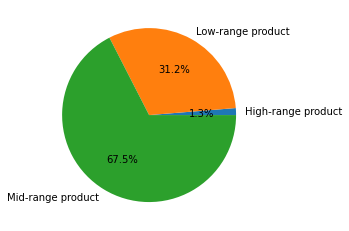

In [39]:
# Pie chart

product_price_pie = df_master['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

In [40]:
# Export visualization

product_price_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','product_price_pie.png'))

### Mid-range and low-range products are the categories with high sales

## Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

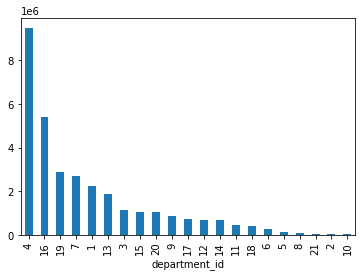

In [41]:
# Department ID bar chart

product_orders_bar = round(df_master.groupby(['department_id'])['order_id'].agg('count').sort_values(ascending=False),0).plot.bar()

In [42]:
# Export visualization

product_orders_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','product_orders_bar.png'))

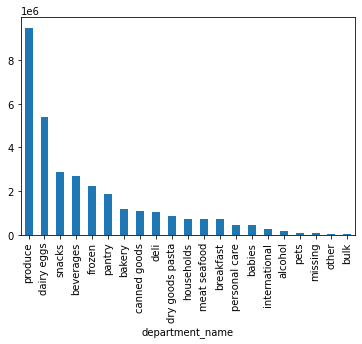

In [43]:
# Bar chart for department and orders

department_orders_bar = round(df_master.groupby(['department_name'])['order_id'].agg('count').sort_values(ascending=False),0).plot.bar()

In [44]:
# Export visualization

department_orders_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_orders_bar.png'))

### 'Produce', 'Dairy eggs' and 'Snacks' are the top three departments that have the highest frequency of product orders

In [45]:
# I will create a column that represents top 5 columns

result = []

for value in df_master['department_id']:
    if value == 1:
        result.append('Top dept')
    elif value == 4:
        result.append('Top dept')
    elif value == 7:
        result.append('Top dept')
    elif value == 16:
        result.append('Top dept')
    elif value == 19:
        result.append('Top dept')
    else:
        result.append('Regular dept')

In [46]:
df_master['top_department'] = result

In [47]:
# Print frequency

df_master['top_department'].value_counts()

Top dept        22688454
Regular dept     9716405
Name: top_department, dtype: int64

In [48]:
# Create a subset for top selling departments

top_selling = df_master[df_master['top_department']=='Top dept']

In [49]:
top_selling['top_department'].value_counts()

Top dept    22688454
Name: top_department, dtype: int64

Text(108.68, 0.5, '')

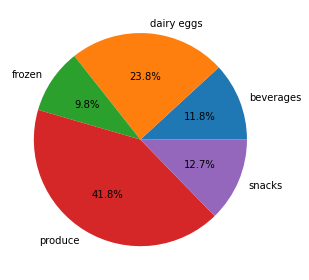

In [50]:
# Check percentage of sales for top departments

pie_department_name = top_selling['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.tight_layout()
plt.ylabel('')

In [51]:
# Export visualization

pie_department_name.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_department_name.png'))

## What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

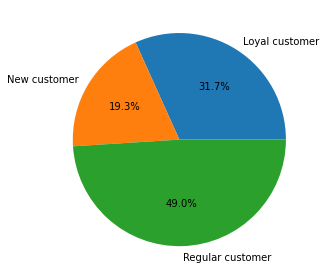

In [52]:
# Pie chart

loyalty_pie = df_master['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()

In [53]:
# Export visualization

loyalty_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_pie.png'))

## Are there differences in ordering habits based on a customer’s loyalty status?

In [54]:
# Crosstab for frequency and loyalty flag

loyalty_status_frequency = pd.crosstab(df_master['frequency_flag'], df_master['loyalty_flag'], dropna = False)

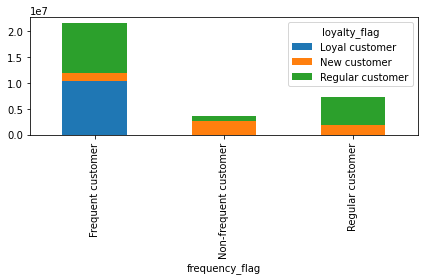

In [55]:
# Bar chart

bar_loyalty_status_frequency = loyalty_status_frequency.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [56]:
# Export visualization

bar_loyalty_status_frequency.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_status_frequency.png'))

## Are there differences in ordering habits based on a customer’s region?

In [57]:
# Crosstab for frequency and region flag

region_frequency = pd.crosstab(df_master['region'], df_master['frequency_flag'], dropna = False)

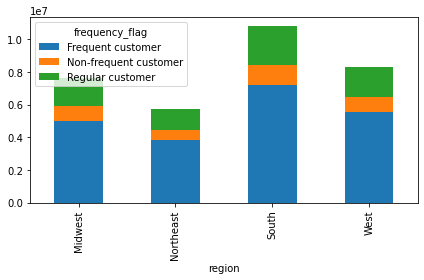

In [58]:
# Bar chart

bar_region_frequency = region_frequency.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [59]:
# Export visualization

bar_region_frequency.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_frequency.png'))

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [60]:
# Crosstab for department and region

crosstab_order_region = pd.crosstab(df_master['department_name'], df_master['region'], dropna = False)

In [61]:
print(crosstab_order_region)

region           Midwest  Northeast    South     West
department_name                                      
alcohol            36186      26542    51624    39344
babies             98983      75139   143654   106026
bakery            273869     208599   388815   301145
beverages         625574     483418   898940   680191
breakfast         163551     123574   234251   181657
bulk                8193       5802    11533     9045
canned goods      250702     186755   356015   274586
dairy eggs       1264223     954026  1796969  1383529
deli              245678     186817   349419   269335
dry goods pasta   203769     151816   287444   223598
frozen            524096     390918   747900   571829
households        175824     131485   243070   188287
international      63736      46891    89142    69484
meat seafood      166129     124620   235752   182426
missing            16535      12374    23193    17043
other               8420       6585    12212     9074
pantry            442101    

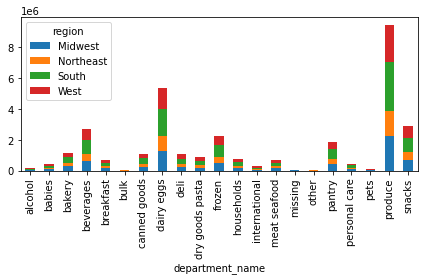

In [62]:
# Bar chart

crosstab_order_region = crosstab_order_region.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [63]:
# Export visualization

crosstab_order_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','crosstab_order_region.png'))

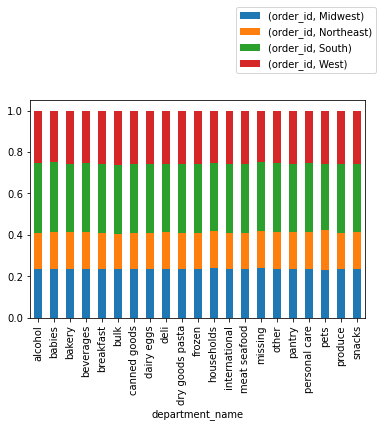

In [64]:
# 100% stacked bar chart 

crosstab_order_region_100_bar = df_master.pivot_table(values=['order_id'], 
                      index='department_name',
                      columns='region',
                      aggfunc='sum')
crosstab_order_region_100_bar = crosstab_order_region_100_bar.div(crosstab_order_region_100_bar.sum(1), axis=0)
crosstab_order_region_100_bar.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor =(0.60, 1.10))

In [65]:
# Crosstab for gender and order frequency

crosstab_gender_order = pd.crosstab(df_master['gender'], df_master['frequency_flag'], dropna = False)

In [66]:
print(crosstab_gender_order)

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
gender                                                                    
Female                   10716655                1794266           3578909
Male                     10843198                1842171           3629655


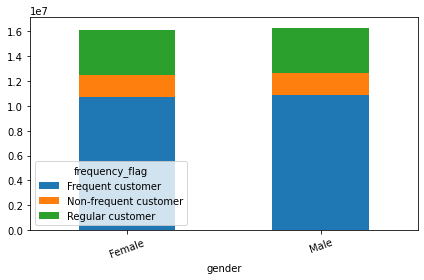

In [67]:
# Bar chart

bar_crosstab_gender_order = crosstab_gender_order.plot(kind = 'bar', stacked = True)
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [68]:
# Export visualization

bar_crosstab_gender_order.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_crosstab_gender_order.png'))

### The order frequency is similar between the gender

## Analysis by age

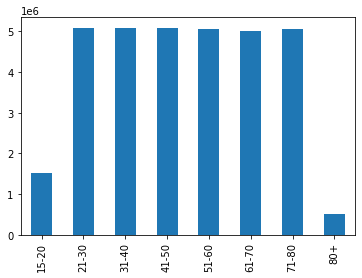

In [69]:
# Total orders by age

bar_age_orders = df_master['age_group'].value_counts().sort_index().plot.bar()

In [70]:
# Export visualization

bar_age_orders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_orders.png'))

In [71]:
# Crosstab for age and department

dept_age = pd.crosstab(df_master['department_name'], df_master['age_group'], dropna = False)

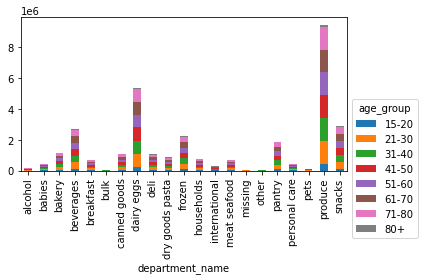

In [72]:
# Bar chart

bar_dept_age = dept_age.plot.bar(stacked = True)
plt.legend(title = 'age_group', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [73]:
# Export visualization

bar_dept_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_age.png'))

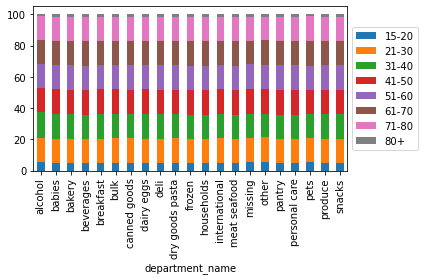

In [74]:
# 100% stacked bar chart 

bar_dept_age_100 = dept_age.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [75]:
# Export visualization

bar_dept_age_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_age_100.png'))

In [76]:
# Crosstab for age and day of week

age_day = pd.crosstab(df_master['day_of_week'], df_master['age_group'], dropna = False)

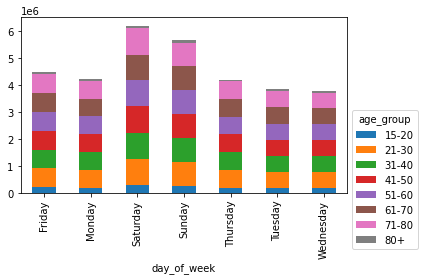

In [7]:
# Bar Chart

bar_age_day= age_day.plot.bar(stacked = True)
plt.legend(title = 'age_group', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [77]:
# Export visualization

bar_age_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_day.png'))

In [78]:
# Crosstab for age and region

age_region = pd.crosstab(df_master['age_group'], df_master['region'], dropna = False)

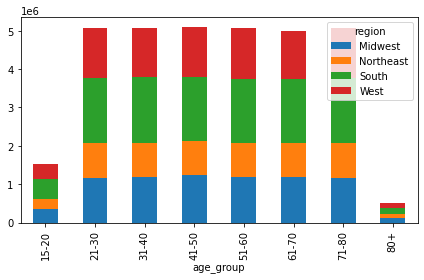

In [81]:
# Bar chart 

bar_age_region = age_region.plot(kind = 'bar', stacked = True,)
plt.tight_layout()

In [82]:
# Export visualization

bar_age_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_region.png'))

In [83]:
# Crosstab for age and spending flag

age_spending = pd.crosstab(df_master['age_group'], df_master['spending_flag'], dropna = False)

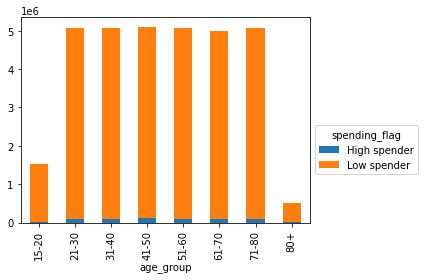

In [84]:
# Bar chart

bar_age_spending = age_spending.plot(kind = 'bar', stacked = True)
plt.legend(title = 'spending_flag',loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [85]:
# Export visualization

bar_age_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_spending.png'))

In [86]:
# Crosstab for age and time of day

age_time = pd.crosstab(df_master['age_group'], df_master['part_of_day'], dropna = False)

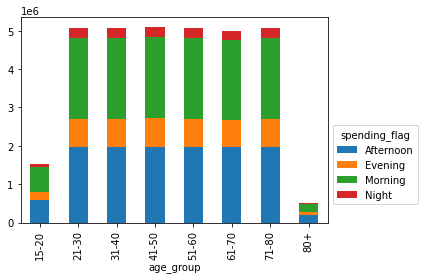

In [87]:
# Bar chart

bar_age_time = age_time.plot(kind = 'bar', stacked = True)
plt.legend(title = 'spending_flag',loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [88]:
# Export visualization

bar_age_time.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_time.png'))

## Analysis by family status -  Marital and parental

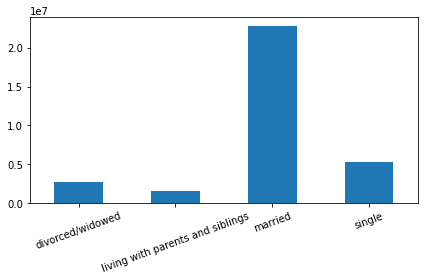

In [89]:
# total orders by marital status 

orders_marital_status = df_master['marital_status'].value_counts().sort_index().plot.bar()
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [90]:
# Export visualization

orders_marital_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_marital_status.png'))

In [91]:
# Crosstab for marital status and department 

marital_status_dept = pd.crosstab(df_master['department_name'], df_master['marital_status'], dropna = False)

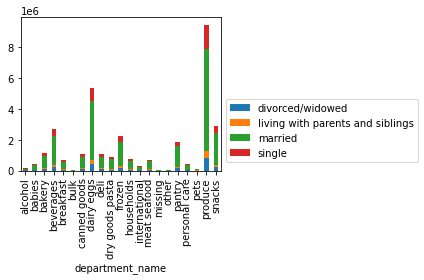

In [92]:
# Bar chart

bar_marital_status_dept = marital_status_dept.sort_index().plot(kind = 'bar', stacked = True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [93]:
# Export visualization

bar_marital_status_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_marital_status_dept.png'))

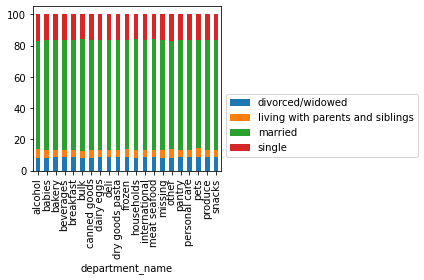

In [94]:
# 100% stacked bar chart

bar_marital_status_dept_100 = marital_status_dept.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [95]:
# Export visualization

bar_marital_status_dept_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_marital_status_dept_100.png'))

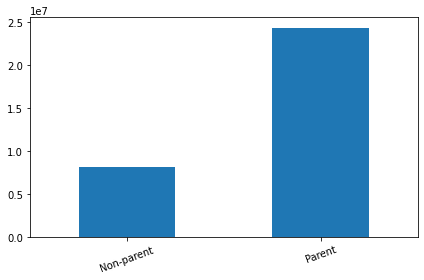

In [96]:
# Total orders by parental status 

orders_parental_status = df_master['parental_status'].value_counts().sort_index().plot.bar()
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [97]:
# Export visualization

orders_parental_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_parental_status.png'))

In [98]:
# Crosstab for department name and parental status for visualization

dept_parent_dependants = pd.crosstab(df_master['department_name'], df_master['parental_status'], dropna = False)

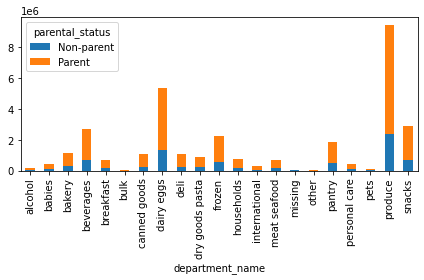

In [99]:
# Bar chart

bar_dept_parent_dependants = dept_parent_dependants.plot.bar(stacked = True)
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [100]:
# Export visualization

bar_dept_parent_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_parent_dependants.png'))

In [101]:
# Crosstab for day of week and parental status

dept_parent_day = pd.crosstab(df_master['day_of_week'], df_master['parental_status'], dropna = False)

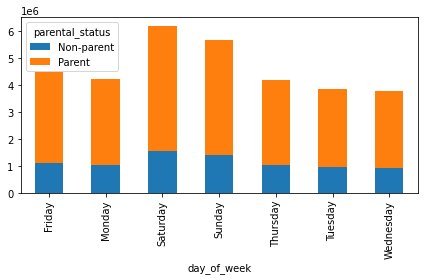

In [115]:
# Bar chart

bar_dept_parent_day = dept_parent_day.plot.bar(stacked = True)
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [117]:
# Export visualization

bar_dept_parent_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_parent_day.png'))

In [118]:
# Crosstab for parental status and part of day

dept_parent_time = pd.crosstab(df_master['part_of_day'], df_master['parental_status'], dropna = False)

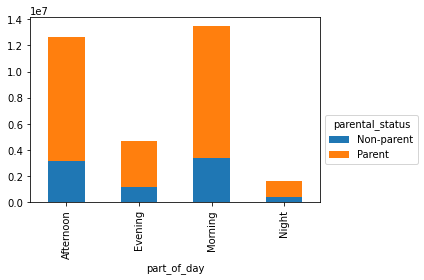

In [104]:
# Bar chart

bar_dept_parent_time = dept_parent_time.plot.bar(stacked = True)
plt.legend(title = 'parental_status',loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [119]:
# Export visualization

bar_dept_parent_time.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_parent_time.png'))

In [120]:
# Crosstab for parental status and spending

dept_parent_spending = pd.crosstab(df_master['parental_status'], df_master['spending_flag'], dropna = False)

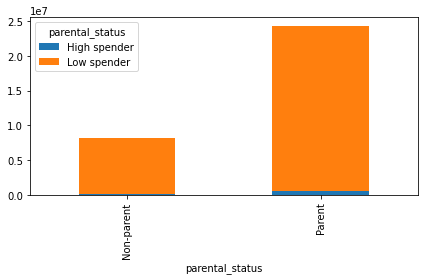

In [121]:
# Bar chart

bar_dept_parent_spending = dept_parent_spending.plot.bar(stacked = True)
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [122]:
# Export visualization

bar_dept_parent_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_parent_spending.png'))

## Analysis by income

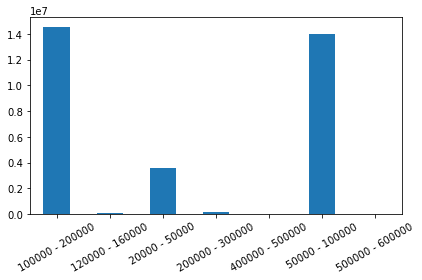

In [123]:
# Total orders per income group

orders_income_age = df_master['income_group'].value_counts().sort_index().plot.bar()
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [124]:
# Export visualization

orders_income_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_income_age.png'))

In [125]:
# Crosstab for department name and income

dept_income = pd.crosstab(df_master['department_name'], df_master['income_group'], dropna = False)

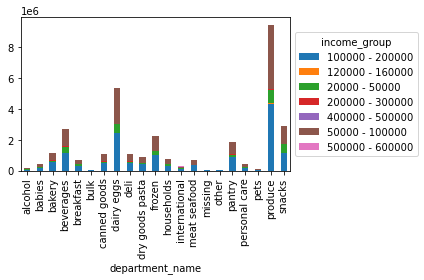

In [126]:
# Bar chart

bar_dept_income = dept_income.plot.bar(stacked = True)
plt.legend(title = 'income_group',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [127]:
# Export visualization

bar_dept_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_income.png'))

In [128]:
# Crosstab for income and spending

spending_income = pd.crosstab(df_master['income_group'], df_master['spending_flag'], dropna = False)

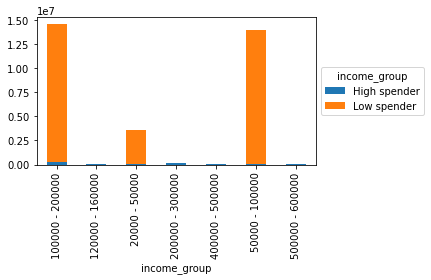

In [129]:
# Bar chart

bar_spending_income = spending_income.plot.bar(stacked = True)
plt.legend(title = 'income_group',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [132]:
# Export visualization

bar_spending_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spending_income.png'))

## Analysis by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

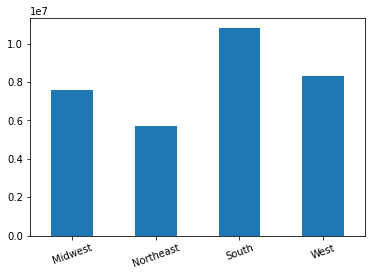

In [133]:
# Total customers across region

bar_region = df_master['region'].value_counts().sort_index().plot.bar()
plt.xticks(rotation= 20, horizontalalignment="center")

In [134]:
# Export visualization

bar_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region.png')

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_8324/722012640.py, line 3)

In [135]:
# Crosstab for income and region

region_income = pd.crosstab(df_master['income_group'], df_master['region'], dropna = False)

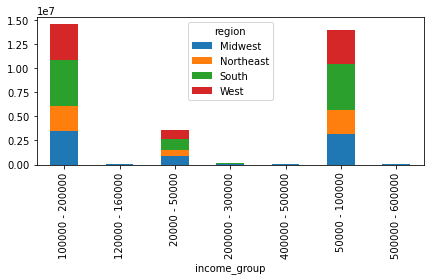

In [136]:
# Bar chart

bar_region_income = region_income.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [137]:
# Export visualization

bar_region_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_income.png'))

In [138]:
# Crosstab for exclusion flag and region

region_exclusion = pd.crosstab(df_master['region'], df_master['exclusion_flag'], dropna = False)

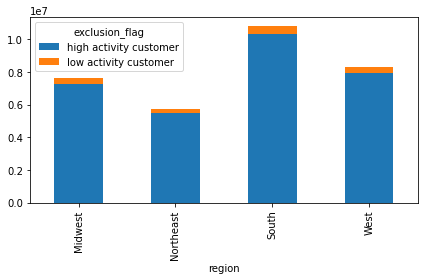

In [139]:
# Bar chart 

bar_region_exclusion = region_exclusion.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [140]:
# Export visualization

bar_region_exclusion.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_exclusion.png'))

In [141]:
# Crosstab for region and spending

region_spending= pd.crosstab(df_master['region'], df_master['spending_flag'], dropna = False)

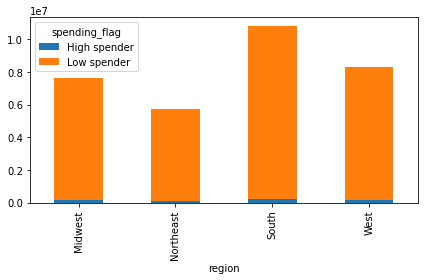

In [142]:
# Bar chart

bar_region_spending = region_spending.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [143]:
# Export visualization

bar_region_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_spending.png'))

### Export latest dataset

In [140]:
df_master.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_master.pkl'))